# Define data

In [31]:
# %load_ext autoreload
# %autoreload 2

from mlscratch.logistic_regression import LogisticRegression
import numpy as np

center1, center2 = [2, 2], [6, 6]
n_data1, n_data2 = 8, 8
sigma = np.array([[1.0, 0.8],
                  [0.8, 1.0]])      # eigenvalues 1.8, 0.2 (SPD)
X1 = np.random.multivariate_normal(center1, sigma, size=n_data1)
X2 = np.random.multivariate_normal(center2, sigma, size=n_data2)

y1 = np.zeros(X1.shape[0])
y2 = np.ones(X2.shape[0])

X = np.concatenate([X1, X2], axis = 0)
y = np.r_[y1, y2]


# Train a model

In [32]:
model = LogisticRegression()
model.fit(X, y)
print(f'cooefficients: {model.coef_}')
print(f'intercept: {model.intercept_}')

cooefficients: [0.60594157 0.61752914]
intercept: -5.458811719438525


# Plot result

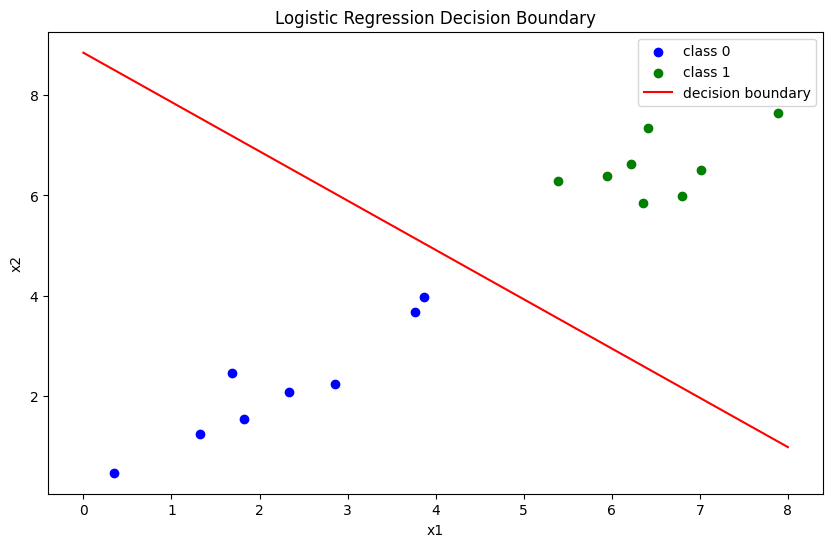

In [33]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X1[:, 0], X1[:, 1], color='b', label="class 0")
plt.scatter(X2[:, 0], X2[:, 1], color='g', label="class 1")

x = np.linspace(0, 8, 100)

w1, w2 = model.coef_
b = model.intercept_

if abs(w2) > 1e-12:  # normal case
    y_boundary = -(w1/w2) * x - b/w2
    plt.plot(x, y_boundary, 'r-', label="decision boundary")
else:  # vertical line case
    x_boundary = -b / w1
    plt.axvline(x_boundary, color='r', linestyle='-', label="decision boundary")

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression Decision Boundary")
plt.show()